In [228]:
#conflict
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
from pandas import DataFrame as df
from mpld3 import plugins, fig_to_html, save_html, fig_to_dict
from tqdm import tqdm
import numpy as np
import json
from tensorflow.keras.preprocessing.text import text_to_word_sequence
#character, setting
import numpy as np
import gensim
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from nltk.tokenize import sent_tokenize
import multiprocessing
import os
from pathlib import Path
import io
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Conflict Ratio Analysis...

In [229]:
# conflocit ratio Analysis...
def conflict(input_text):
    contents = str(input_text)
    token_list_str = text_to_word_sequence(contents) #tokenize

    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]

    count_conflict_list = []
    for i in token_list_str:
        for j in confict_words_list:
            if i == j:
                count_conflict_list.append(j)

    len(count_conflict_list)#한 문장에 들어있는 conflict 단어 수




    list_str = contents.split(".")  #문장별로 분리한다. 분리는 .를 기준으로 한다.   


    listSentiment = []

    sid = SentimentIntensityAnalyzer()

    i=0
    for sentence in tqdm(list_str): #한문장식 가져와서 처리한다.
        ss = sid.polarity_scores(sentence) #긍정, 부정, 중립, 혼합점수 계산
        #print(ss.keys())
        #print('{}: neg:{},neu:{},pos:{},compound:{}'.format(i,ss['neg'],ss['neu'],ss['pos'],ss['compound']))
        #print('{}: neg:{}'.format(i,ss['neg']))
        i +=1
        listSentiment.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

    listSentiment
    df = pd.DataFrame(listSentiment)
    df.columns = ['neg', 'neu', 'pos','compound']


    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0  else 'neg')

    df['comp_score'].value_counts()

    conflict_ratio = df['comp_score'].value_counts(normalize=True) #상대적 비율 계산
    
    return conflict_ratio

In [230]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

In [231]:
re_conflict = conflict(text)
re_conflict #이 결과를  Plot 계산에 반영

100%|██████████| 335/335 [00:00<00:00, 5598.04it/s]


pos    0.871642
neg    0.128358
Name: comp_score, dtype: float64

## Character ratio analysis...

In [232]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [233]:
def character(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #캐릭터 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    character_list = ['i', 'my', 'me', 'mine', 'you', 'your', 'they','them',
                      'yours', 'he','him','his' 'she','her','it','someone','their', 'myself', 'aunt',
                    'brother','cousin','daughter','father','grandchild','granddaughter','granddson','grandfather',
                    'grandmother','great-grandchild','husband','ex-husband','son-in-law', 'daughter-in-law','mother',
                    'niece','nephew','parents','sister','son','stepfather','stepmother','stepdaughter', 'stepson',
                    'twin','uncle','widow','widower','wife','ex-wife']
    
    ####문장에 char_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_chr_text = []
    for k in token_input_text:
        for j in character_list:
            if k == j:
                filtered_chr_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_chr_text_ = set(filtered_chr_text) #중복제거
    filtered_chr_text__ = list(filtered_chr_text_) #다시 리스트로 변환
    #print (filtered_chr_text__) # 중복값 제거 확인
    
    for i in filtered_chr_text__:
        ext_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    char_total_count = len(filtered_chr_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 캐릭터 표현 수
    char_count_ = len(filtered_chr_text__) #중복제거된 캐릭터 표현 총 수
        
    result_char_ratio = round(char_total_count/total_words * 100, 2)

    #return result_char_ratio, total_sentences, total_words, char_total_count, char_count_, ext_sim_words_key
    return result_char_ratio

In [234]:
re_character = character(text)
re_character

C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


9.83

## Setting

In [235]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [242]:
def setting_anaysis(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #setting을 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    location_list = ['above', 'behind','below','beside','betweed','by','in','inside','near',
                     'on','over','through']
    time_list = ['after', 'before','by','during','from','on','past','since','through','to','until','upon']
      
    movement_list = ['against','along','down','from','into','off','on','onto','out of','toward','up','upon']
    
    palce_terrain_type_list = ['wood', 'forest', 'copse', 'bush', 'trees', 'stand',
                                'swamp', 'marsh', 'wetland', 'fen', 'bog', 'moor', 'heath', 'fells', 'morass',
                                'jungle', 'rainforest', 'cloud forest','plains', 'fields', 'grass', 'grassland', 
                                'savannah', 'flood plain', 'flats', 'prairie','tundra', 'iceberg', 'glacier', 
                                'snowfields','hills', 'highland,' 'heights', 'plateau', 'badland', 'kame', 'shield',
                                'downs', 'downland', 'ridge', 'ridgeline','hollow,' 'valley',' vale','glen', 'dell',
                                'mountain', 'peak', 'summit', 'rise', 'pass', 'notch', 'crown', 'mount', 'switchback',
                                'furth','canyon', 'cliff', 'bluff,' 'ravine', 'gully', 'gulch', 'gorge',
                                'desert', 'scrub', 'waste', 'wasteland', 'sands', 'dunes',
                                'volcano', 'crater', 'cone', 'geyser', 'lava fields']
    
    water_list = ['ocean', 'sea', 'coast', 'beach', 'shore', 'strand','bay', 'port', 'harbour', 'fjord', 'vike',
                  'cove', 'shoals', 'lagoon', 'firth', 'bight', 'sound', 'strait', 'gulf', 'inlet', 'loch', 
                  'bayou','dock', 'pier', 'anchorage', 'jetty', 'wharf', 'marina', 'landing', 'mooring', 'berth', 
                  'quay', 'staith','river', 'stream', 'creek', 'brook', 'waterway', 'rill','delta', 'bank', 'runoff',
                  'channel', 'bend', 'meander', 'backwater','lake', 'pool', 'pond', 'dugout', 'fountain', 'spring', 
                  'watering-hole', 'oasis','well', 'cistern', 'reservoir','waterfall', 'falls', 'rapids', 'cataract', 
                  'cascade','bridge', 'crossing', 'causeway', 'viaduct', 'aquaduct', 'ford', 'ferry','dam', 'dike', 
                  'bar', 'canal', 'ditch','peninsula', 'isthmus', 'island', 'isle', 'sandbar', 'reef', 'atoll', 
                  'archipelago', 'cay','shipwreck', 'derelict']
    
    
    outdoor_places_list = ['clearing', 'meadow', 'grove', 'glade', 'fairy ring','earldom', 'fief', 'shire',
                            'ruin', 'acropolis', 'desolation', 'remnant', 'remains',
                            'henge', 'cairn', 'circle', 'mound', 'barrow', 'earthworks', 'petroglyphs',
                            'lookout', 'aerie', 'promontory', 'outcropping', 'ledge', 'overhang', 'mesa', 'butte',
                            'outland', 'outback', 'territory', 'reaches', 'wild', 'wilderness', 'expanse',
                            'view', 'vista', 'tableau', 'spectacle', 'landscape', 'seascape', 'aurora', 'landmark',
                            'battlefield', 'trenches', 'gambit', 'folly', 'conquest', 'claim', 'muster', 'post',
                            'path', 'road', 'track', 'route', 'highway', 'way', 'trail', 'lane', 'thoroughfare', 'pike',
                            'alley', 'street', 'avenue', 'boulevard', 'promenade', 'esplande', 'boardwalk',
                            'crossroad', 'junction', 'intersection', 'turn', 'corner','plaza', 'terrace', 'square', 
                            'courtyard', 'court', 'park', 'marketplace', 'bazaar', 'fairground','realm', 'land', 'country',
                            'nation', 'state', 'protectorate', 'empire', 'kingdom', 'principality','domain', 'dominion',
                            'demesne', 'province', 'county', 'duchy', 'barony', 'baronetcy', 'march', 'canton']

    
    underground_list = ['pit', 'hole', 'abyss', 'sinkhole', 'crack', 'chasm', 'scar', 'rift', 'trench', 'fissure',
                        'cavern', 'cave', 'gallery', 'grotto', 'karst',
                        'mine', 'quarry', 'shaft', 'vein','graveyard', 'cemetery',
                        'darkness', 'shadow', 'depths', 'void','maze', 'labyrinth'
                        'tomb', 'grave', 'crypt', 'sepulchre', 'mausoleum', 'ossuary', 'boneyard']
                        
    living_places_list = ['nest', 'burrow', 'lair', 'den', 'bolt-hole', 'warren', 'roost', 'rookery', 'hibernaculum',
                         'home', 'rest', 'hideout', 'hideaway', 'retreat', 'resting-place', 'safehouse', 'sanctuary',
                         'respite', 'lodge','slum', 'shantytown', 'ghetto','camp', 'meeting place,' 'bivouac', 'campsite', 
                         'encampment','tepee', 'tent', 'wigwam', 'shelter', 'lean-to', 'yurt','house', 'mansion', 'estate',
                         'villa','hut', 'palace', 'outbuilding', 'shack tenement', 'hovel', 'manse', 'manor', 'longhouse',
                         'cottage', 'cabin','parsonage', 'rectory', 'vicarge', 'friary', 'priory','abbey', 'monastery', 
                         'nunnery', 'cloister', 'convent', 'hermitage','castle', 'keep', 'fort', 'fortress', 'citadel', 
                         'bailey', 'motte', 'stronghold', 'hold', 'chateau', 'outpost', 'redoubt',
                         'town', 'village', 'hamlet', 'city', 'metropolis','settlement', 'commune']

    building_facilities_list = ['temple', 'shrine', 'church', 'cathedral', 'tabernacle', 'ark', 'sanctum', 'parish', 'university',
                                'chapel', 'synagogue', 'mosque','pyramid', 'ziggurat', 'prison', 'jail', 'dungeon',
                                'oubliette', 'hospital', 'hospice', 'stocks', 'gallows','asylum', 'madhouse', 'bedlam',
                                'vault', 'treasury', 'warehouse', 'cellar', 'relicry', 'repository',
                                'barracks', 'armoury','sewer', 'gutter', 'catacombs', 'dump', 'middens', 'pipes', 'baths', 'heap',
                                'mill', 'windmill', 'sawmill', 'smithy', 'forge', 'workshop', 'brickyard', 'shipyard', 'forgeworks',
                                'foundry','bakery', 'brewery', 'almshouse', 'counting house', 'courthouse', 'apothecary', 'haberdashery', 'cobbler',
                                'garden', 'menagerie', 'zoo', 'aquarium', 'terrarium', 'conservatory', 'lawn', 'greenhouse',
                                'farm', 'orchard', 'vineyard', 'ranch', 'apiary', 'farmstead', 'homestead',
                                'pasture', 'commons', 'granary', 'silo', 'crop','barn', 'stable', 'pen', 'kennel', 'mews', 'hutch', 
                                'pound', 'coop', 'stockade', 'yard', 'lumber yard','tavern', 'inn', 'pub', 'brothel', 'whorehouse',
                                'cathouse', 'discotheque','lighthouse', 'beacon','amphitheatre', 'colosseum', 'stadium', 'arena', 
                                'circus','academy', 'university', 'campus', 'college', 'library', 'scriptorium', 'laboratory', 
                                'observatory', 'museum']
    
    
    architecture_list = ['hall', 'chamber', 'room','nave', 'aisle', 'vestibule',
                        'antechamber', 'chantry', 'pulpit','dome', 'arch', 'colonnade',
                        'stair', 'ladder', 'climb', 'ramp', 'steps',
                        'portal', 'mouth', 'opening', 'door', 'gate', 'entrance', 'maw',
                        'tunnel', 'passage', 'corridor', 'hallway', 'chute', 'slide', 'tube', 'trapdoor',
                        'tower', 'turret', 'belfry','wall', 'fortifications', 'ramparts', 'pallisade', 'battlements',
                        'portcullis', 'barbican','throne room', 'ballroom','roof', 'rooftops', 'chimney', 'attic',
                        'loft', 'gable', 'eaves', 'belvedere','balcony', 'balustrade', 'parapet', 'walkway', 'catwalk',
                        'pavillion', 'pagoda', 'gazebo','mirror', 'glass', 'mere','throne', 'seat', 'dais',
                        'pillar', 'column', 'stone', 'spike', 'rock', 'megalith', 'menhir', 'dolmen', 'obelisk',
                        'statue', 'giant', 'head', 'arm', 'leg', 'body', 'chest', 'body', 'face', 'visage', 'gargoyle', 'grotesque',
                        'fire', 'flame', 'bonfire', 'hearth', 'fireplace', 'furnace', 'stove','window', 'grate', 'peephole', 
                        'arrowslit', 'slit', 'balistraria', 'lancet', 'aperture', 'dormerl']
    
    
    setting_words_filter_list = location_list + time_list + movement_list + palce_terrain_type_list + water_list + outdoor_places_list + underground_list + underground_list + living_places_list + building_facilities_list + architecture_list

    
    ####문장에 setting_words_filter_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_setting_text = []
    for k in token_input_text:
        for j in setting_words_filter_list:
            if k == j:
                filtered_setting_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_setting_text_ = set(filtered_setting_text) #중복제거
    filtered_setting_text__ = list(filtered_setting_text_) #다시 리스트로 변환
    print (filtered_setting_text__) # 중복값 제거 확인
    
    for i in filtered_setting_text__:
        ext_setting_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    setting_total_count = len(filtered_setting_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 setting 표현 수
    setting_count_ = len(filtered_setting_text__) #중복제거된 setting표현 총 수
        
    result_setting_words_ratio = round(setting_total_count/total_words * 100, 2)
    return result_setting_words_ratio, total_sentences, total_words, setting_total_count, setting_count_, ext_setting_sim_words_key

In [243]:
text = """A window into the soul.For most people, this would be the eyes. The eyes cannot lie; they often tell more about a person's emotions than their words. What distinguishes a fake smile from a genuine one? The eyes. What shows sadness? The eyes. What gives away a liar? The eyes.But are the eyes the only window into the soul?Recently, I began painting with watercolors. With watercolors, there is no turning back: if one section is too dark, it is nearly impossible to lighten the area again. Every stroke must be done purposefully, every color mixed to its exact value.I laid my materials before me, preparing myself for the worst. I checked my list of supplies, making sure my setup was perfect.I wet my brush, dipped it into some yellow ochre, and dabbed off the excess paint. Too little water on my brush. I dipped my brush back into my trusty water jar; the colors swirled beautifully, forming an abstract art piece before my eyes. \u2014It's a shame that I couldn't appreciate it.I continued mixing colors to their exact value. More alizarin crimson. More water. More yellow ochre. Less water. More phthalo blue. The cycle continued. Eventually, I was satisfied. The colors looked good, there was enough contrast between facial features, and the watercolors stayed inside the lines.Craving feedback, I posted my art to Snapchat. I got a few messages such as 'wow' and 'pretty,' but one message stood out. 'You were anxious with this one, huh? Anyways, love the hair!'I was caught off guard. Was it a lucky guess? Did they know something I didn't? I immediately responded: 'Haha, how could you tell?' No response.What I didn't know at the time was that my response would come a few months later while babysitting. Since the girl I was babysitting loved art, I took out some Crayola watercolors and some watercolor paper for her to play with. After I went to the bathroom and came back, the watercolors were doused with water. 'You were impatient with this one, huh? Anyways, love the little dog you drew!'The little girl looked up at me, confused. 'How could you tell?' 'You used a lot of water for a brighter color, but you couldn't wait for it to slowly soak in.''Oh.'Now, I would be lying if I said I realized the connection between the two events immediately.Instead, I made the connection when I decided to sit down one day and objectively critique my art. The piece that I once loved now seemed like a nervous wreck: the paper was overworked, the brushstrokes were undecided, the facial features blended together, and each drop of water was bound inside the lines as if it was a prisoner in a cage.From then on, I started noticing pieces of personality in additional creations surrounding me: website designs, solutions to math problems, code written for class, and even the preparation of a meal.When I peer around at people's projects during Code Club, I notice the clear differences between their code. Some people break it up by commenting in every possible section. Others breeze through the project, not caring to comment or organize their code. I could also see clear differences in personalities when our club members began coding the Arduino for the first time. Some followed the tutorials to the letter, while others immediately started experimenting with different colored LEDs and ways of wiring the circuit.It became clear to me that, as humans, we leave pieces of our souls in everything we do, more than we intend to. If we entertain this thought, perhaps the key to better understanding others around us is simply noticing the subtler clues under our noses?Perhaps there are endless windows to the soul, and we simply need to peer through them. I shakily rose my hand. 'We should create workshops of our own,' I suggested.I got a few strange looks. 'It's a good idea, but it's too much work.' 'We just don't have enough free time to make it work.' 'Maybe we could, but I don't know how to make workshops.' My suggestion was shot down. I shuffled in my seat. 'I could make them.' A few people stared at me in disbelief. I glanced over at the club advisor, Mr. C, nervous to hear his response.'If you're willing to take on the work, we can try it.' Mr. C replied. And so I embarked on my quest. I researched different workshops on the internet, learning the information myself at first. Then, I transitioned into creating workshops of my own, making sure that the information was easy to understand for even a beginner. I was exhausted; my first workshop took 16 cumulative hours to create."""

In [244]:
setting_anaysis(text) # 문장에서 키워드와 관련된 단어을 모두 추출하면 이런 결과가 나옴, 이 결과를 모두 합쳐서 setting 총 값 계산해서 숫자로 출력

['after', 'into', 'window', 'before', 'by', 'up', 'inside', 'off', 'through', 'in', 'on', 'over', 'workshop', 'during', 'down', 'seat', 'since', 'to', 'from']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


(8.37,
 60,
 932,
 78,
 19,
 [('cage', 0.9883323907852173),
  ('smile', 0.9766367673873901),
  ('prisoner', 0.974723219871521),
  ('fake', 0.9725433588027954),
  ('genuine', 0.9693905115127563),
  ('distinguishes', 0.9663564562797546),
  ('then', 0.9635818004608154),
  ('a', 0.9594760537147522),
  ('messages', 0.9514330625534058),
  ('used', 0.9489181637763977)])

In [247]:
df = setting_anaysis((text))
df_ = pd.DataFrame(df, index = [
                                'setting ratio','total sentences', 'toral words', 'setting_total_count',
                                'ext_setting_words_no', 'ext_setting_sim_words_samples'
                                ], columns = ['Value']
                  )
df_ # 이 겨래과에서는 92라는 숫자만 의미가 있지 >>> 총 문장에 setting를 표현한 수가 총 몇개인지 추출한 결과            

['after', 'into', 'window', 'before', 'by', 'up', 'inside', 'off', 'through', 'in', 'on', 'over', 'workshop', 'during', 'down', 'seat', 'since', 'to', 'from']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:138: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


,Value
setting ratio,8.37
total sentences,60
toral words,932
setting_total_count,78
ext_setting_words_no,19
ext_setting_sim_words_samples,"[(cage, 0.9883323907852173), (smile, 0.9766367..."


##  paragraph(문단)을 나누려면, 핵심주제어를 추출하고, 주제어가 포함된 문장과 주제어와 연관된 문장을 찾아서 모두 추출한다.
## 문장은 순서대로 추출하면서 핵심 주제어가 포함된 문장으로 구분지으면 문단이 구분된다.

In [157]:
# 핵심주제어를 추출한다.
# 추출한 핵심주제어가 포함된 문장을 모두 추출한다.
# 주제어와 연관성이 있는 단어들(유사어)도 추출한다.유사어가 있는 문장도 추출한다.
# 추출한 문장을 주제어별로 분류한다. 분류는 3개로 제한한다.
# 가장 먼저 추출된 문단(paragraph)이 intro - body - conclusion이 된다. 

In [158]:
#핵심주제어 추출
#TEXTRANK BASED KEYWORD EXTRACTION

from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import en_core_web_lg
nlp = en_core_web_lg.load()

In [159]:
#!pip install -U spacy
#!python -m spacy download en_core_web_lg

In [160]:
class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):

        keyword_key = ""
    

        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            
            keyword_key = str(keyword_key) + "," + str(key)
            if i > number:
                break
        
        print(keyword_key)
        return keyword_key
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight


In [183]:
def keywordsExtraction(text) :
   

    tr4w = TextRank4Keyword()
    tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=4, lower=False)
    
    keyword_key = ""

    """Print top number keywords"""
    node_weight = OrderedDict(sorted(tr4w.node_weight.items(), key=lambda t: t[1], reverse=True))
    list_keyword_key = []
    for i, (key, value) in enumerate(node_weight.items()):
        #print(key + ' - ' + str(value))
        
        # keyword_key = str(keyword_key) + "," + str(key)
        list_keyword_key.append(str(key))
        
        if i > 3:
            break
    
    
    
    print(list_keyword_key)
    return list_keyword_key

In [184]:
#핵심주제어 추출
topic = keywordsExtraction(text)
topic

['stories', 'mom', 'school', 'world', 'way']


['stories', 'mom', 'school', 'world', 'way']

In [185]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

In [186]:
#핵심주제어가 포함된 문장 추출
def findSentence(fileName, findText):

    result = []
    data = fileName
    data = data.splitlines()

    for line in data:
        sentences = line.split(". ")
        for sentence in sentences:
            sentence = sentence.strip(".")
            if findText in sentence:
                result.append(sentence + ".")

    return result

In [187]:
###### 각 문장이 전체 문단에서 어디에 위치해 있는지 확인하기
#문장을 비교해서 있으면 1, 없으면 0으로 표시하여 리스트로 반환

#우선 모든 문장을 데이터프레임에 .로 분리해서 넣기
def all_text_to_dataframe(text_input_):
    result_ = []
    data = text_input_
    data = data.splitlines()
    
    for line in data:
        sentences = line.split(".")
        result_.append(sentences)
    return result_

In [188]:
#모든 문장을 Datafrmae에 넣고 인덱스로 처리
all_df = pd.DataFrame(all_text_to_dataframe(text))
all_sentences_df = all_df.transpose() #행렬 변환
all_sentences_df.columns =["Sentences"] # columns =["Sentences"] 추가
all_sentences_df #결과확인

,Sentences
0,"Physically, besides our Chinese complexion, th..."
1,Lots of it
2,I tie my bushy ponytail with two actual rubber...
3,"My brother never wears shorts on first dates,..."
4,"And since I was young, I've loved ruffling my..."
...,...
330,What is the most significant challenge that so...
331,The flight attendants and I carry 57 orphans ...
332,"When we arrive in California from Vietnam, Pr..."
333,This act of passion catalyzes a movement—Oper...


In [189]:
topic

['stories', 'mom', 'school', 'world', 'way']

In [205]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

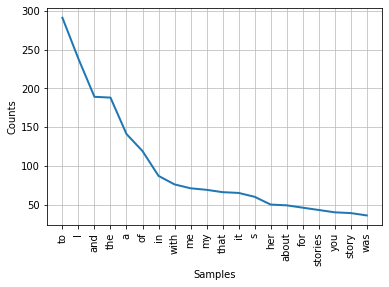

In [206]:
#가장 많이 사용된 단어 파악
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")

from nltk import Text
text = Text(retokenize.tokenize(text))
text.plot(20)
plt.show()

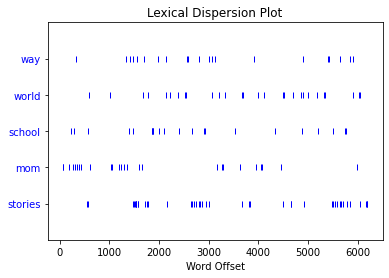

In [207]:
text.dispersion_plot(topic)
#토픽별로 어떤 위치에 얼마나 토픽단어가 사용되었는지 파악

#생각해 볼 것 : 토픽 단어 사용량, 단어 분포량, 토픽과의 관계 망(그래프)

In [278]:
topic

['stories', 'mom', 'school', 'world', 'way']

In [279]:
for k in topic:
    print (k)

stories
mom
school
world
way


In [280]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

In [284]:
topic_total_count = []
for c in topic:
    tc= text.count(c)
    topic_total_count.append(tc)

topic_total_count  # 결과는 ['stories', 'mom', 'school', 'world', 'way']의 총 사용된 수

[43, 39, 22, 28, 37]

In [295]:
#각 주제어가 전체 단어에 포함되는 비율
topic_word_ratio = []
total_text_no = len(text_to_word_sequence(text)) #토큰화한 문장 전체 단어 개수
print (total_text_no)
for t_word in topic_total_count:
    t_ratio = (t_word / total_text_no) * 100
    topic_word_ratio.append(t_ratio)

topic_word_ratio # 각 주제어가 전체 문자에 얼마나 포함되어 있는지 비율을 계산  %
# 이 결과를 총점 40%로 만들어 내야 함(수학공식을 만들어서)
# 에세이를 서론, 본론, 결론을 넣어서 계산한 값을 토대로  이 코드를 이용해서 얻은 값을 보정할 것

6253


[0.6876699184391492,
 0.6237006237006237,
 0.3518311210618903,
 0.44778506316967853,
 0.591715976331361]

In [ ]:
#####  topic 자료를 토대로 그래프로 그리거나 이 결과값을 계산하여 측정할 수 있는 단일 값을 만들어 본다면????????

In [248]:
#network 그래프로 표현해보자
# ref: https://towardsdatascience.com/populating-a-network-graph-with-named-entities-fb8e3d2a380f

# pip install -U spacy
# python -m spacy download en
# pip install networkx
# pip install fuzzywuzzy

In [253]:
import pandas as pd
import numpy as np
import pickle
from operator import itemgetter
from fuzzywuzzy import process, fuzz
# for natural language processing
import spacy
import en_core_web_lg
# for visualizations
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

In [254]:
G = nx.Graph()

In [255]:
for i in topic:
    G.add_nodes_from(i)

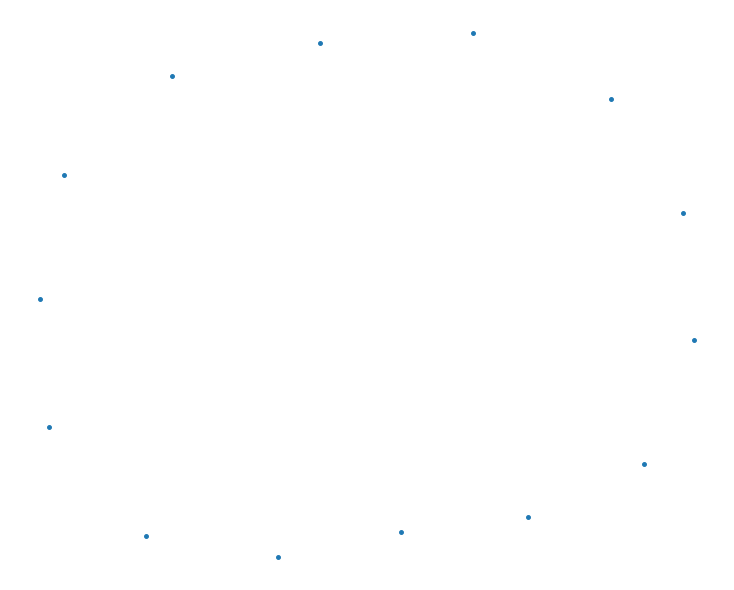

In [256]:
figure(figsize=(10, 8))
nx.draw(G, node_size=15)

In [257]:
for entities in topic:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

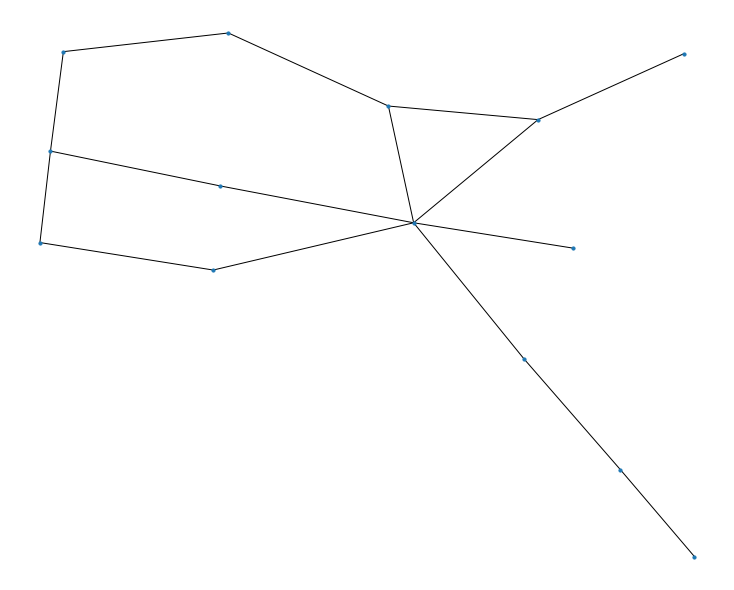

In [258]:
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

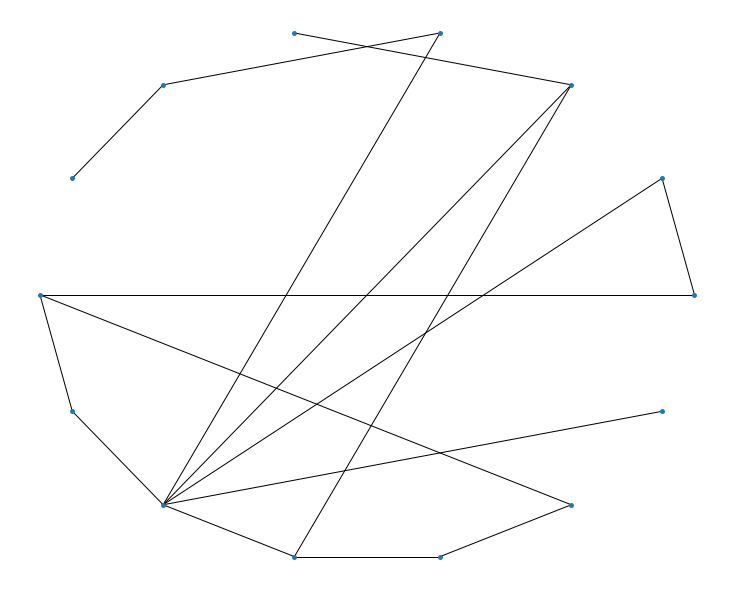

In [259]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)

In [260]:
G.degree()

DegreeView({'s': 3, 't': 2, 'o': 8, 'r': 3, 'i': 2, 'e': 2, 'm': 1, 'c': 2, 'h': 2, 'l': 3, 'w': 2, 'd': 1, 'a': 2, 'y': 1})

In [261]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('o', 8)

In [262]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [263]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('o', 8)
('s', 3)
('r', 3)
('l', 3)
('t', 2)


In [264]:
nx.write_gexf(G, "npr_coronavirus_GPE_50.gexf")

In [ ]:
### 이하 자료는 개발하다 중단한 코드임....

## Sentence Segmentation using Spacy

In [217]:
import spacy
import re

nlp = spacy.load('en_core_web_lg')
boundary = re.compile('^[0-9]$')

def custom_seg(doc):
    prev = doc[0].text
    length = len(doc)
    for index, token in enumerate(doc):
        if (token.text == '.' and boundary.match(prev) and index!=(length - 1)):
            doc[index+1].sent_start = False
        prev = token.text
    return doc

nlp.add_pipe(custom_seg, before='parser')

In [218]:
text = """Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair. Lots of it.I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking\u2014and still, it whacks my face when playing tennis. My brother never wears shorts on first dates, to hide his hairy legs. And since I was young, I've loved ruffling my mom's abundant hair.That changed my junior year, when my mom came home with her hair shaved off.I could barely recognize her. It was in that moment that the reality of her breast cancer hit me. I felt compelled to do anything to help her. To be strong for her. I held her close and somehow I knew we were going to be okay.Her cancer made me step up as a daughter. I did things for her out of love that I would have never done for myself. When her joints ached, I scoured the internet to find comfortable shoes for her. When she needed exercise but was too tired, I did leg lifts with her in bed.After a few cycles of chemo, my mom's blood counts were low. When she smelled her once-favorite foods, she wanted to throw up. But I knew she needed her nutrition. I asked the school's cooking teacher for recommendations. She gave me a whole cookbook of just soups, and I experimented at home with new flavors, ranging from minestrone to broccoli-cheddar, unusual to our Chinese cuisine. Mom's next blood test results showed her counts increased. I quit the tennis team to care for my mom. Tennis had been my first identity in high school. It shaped my work ethic and taught me resilience in the face of hard losses. But during tennis season, when my mom went through her toughest chemotherapy sessions, I knew I had to be there for her. In a way, tennis was an artificial environment to practice for the real challenges of life. I saw more powerful ways to use what the sport had taught me. My mom needed me more than my team did, and I needed more time with her.Mom's cancer taught me that each moment was important. I'll remember planting kisses on my mom's face as I tucked her into bed. I'll remember cleaning up her vomit with my dad in the small bathroom, working together with gloved hands. I'll remember telling a classmate about my mom's cancer, and her response: 'I haven't told anyone. I have leukemia. Now I realize I'm not alone.' Through laughter and conversations about family struggles, hospital visits, and favorite songs, we made a deep connection. I realized that there were important moments not just with family, but also with the people around me. I wanted to appreciate them all.As a journalist, I hoped to make moments important for others too. Where the boys basketball team saw their usual post-game meeting in the locker room, I saw a story of how a team became a family. Where a math teacher didn't think twice about his doodling, I saw a hidden talent worth featuring. I found so much inspiration in learning about what made people uniquely themselves: their stories, ideas, opinions. I wanted to capture those unique stories of my school, for people to feel important and heard. I found my new identity, a student journalist: a listener who sees the world with curiosity, compassion and purpose\u2014someone who helps empower others.This summer, I donated 9 inches of my ponytail. I imagine the strands bringing confidence to someone I'll never know. As I helped my mom pick out a wig to wear when returning to work, I saw small hairs beginning to grow. I saw resilience.As our hair grows, I will too. Smiling through challenges and learning from them. Appreciating the people around me. Making every moment important.When I saw the iconic photo of Alan Kurdi washed ashore, I cried. After class, I stayed behind with my friend Meghana, trying to grasp the complexities of the Syrian Refugee Crisis, wishing we could do something. Online, Meghana and I discovered Paper Airplanes: a non-profit that connects students with Syrian refugees to tutor. We established Lynbrook's chapter, inviting students to join through social media. Twenty committed to help.Through Paper Airplanes, I tutored a 17-year-old Syrian refugee living in Turkey, who wanted to take the TOEFL to attend college. Helping him grow from incomplete English sentences to his first essay filled me with pride. I wanted to be the best tutor possible for him, and I saw the other twenty tutors feel the same about their own students. But many were intimidated to teach English learners for the first time.I set out to help, reading education blogs and drawing from my experiences to create tutoring-workshops such as 'Spicing up Grammar Lessons' and 'Fun Writing Activities.' I also led discussions where we devised ways to improve lessons and empower our students. For example, Zahra's student spoke Arabic during lessons because she was afraid to make mistakes in English. Together, we discussed how to create a safe space so students felt comfortable.Initially, some tutors didn't quite understand the realities of the Syrian Refugee Crisis. When some students couldn't be reached due to their unstable lives, I encouraged them to use it as a learning opportunity to understand what being a refugee meant. This year, we've expanded our leadership team and number of tutors and plan to spread more awareness about refugee and immigrant rights through speaker events. It has been so fulfilling to see the growth in our tutors: not only have they gained confidence in their leadership abilities, but they've also formed lasting friendships with their students and personal connections to this global issue.The Syrian Refugee Crisis remains a daunting issue to solve, but I believe through education and empathy, we can make a meaningful difference and make the world feel more connected.My junior year, creative problem solving took on a new meaning for me when my mom was diagnosed with breast cancer. To help with the challenges arising from her chemotherapy, I found solutions with creativity and love.Chemotherapy killed my mom's taste buds, and her once-favorite foods became difficult to swallow. I knew she needed her nutrition; I thought, if she were to try foods that she hasn't eaten before, she would have no prior expectation of their flavor, so she wouldn't be as disappointed. Every night, I would cook her different foods from different cuisines. I was ecstatic when she enjoyed them a lot more.However, another problem arose. A few hours after eating her meals, she would become nauseous and vomit her food, undigested. Her doctor told her this was normal. I knew vomiting was a side effect of chemotherapy, but I refused to accept that there was nothing I could do about it. Exercising, I thought, could be a possible solution. If she moved around, I thought, it could help my mom's body actively digest food. I knew this wouldn't solve the entire problem, but I hoped it would make a difference. So, I'd go on walks with my mom to encourage her to move around, and bought her new, comfortable shoes when her feet were swollen. As she had more chemo treatments, she became too tired to get out of bed. I created a workout for her to do in bed, consisting of leg lifts, crunches (with me holding down her legs), and arm circles \u2014 all done without standing up. The exercise did help my mom's digestion. It also helped her in ways I didn't imagine: going on walks helped her calm her mind, and exercising together in bed gave us another way to bond together. An act of creativity not only brought a solution to a problem, but it also created happy memories. In taking care of my mom, I've learned to use creative problem solving to help others, and to face challenges with positivity and resilience.I'm fascinated by the interdisciplinary potential of computer science. Beyond data structures and algorithms, it's about solving problems creatively.When I entered high school, I started teaching myself through MIT's OpenCourseWare, working my way through problem sets with Python. In sophomore year, I took C++ courses at Foothill College. In addition to teaching me about object-oriented programming and pointers, my professor introduced me to the 3 P's: Patience, Practice, and Perseverance. Today, I strive to use the 3 P's in everything I do.My junior year, I realized technology could positively impact the way our school newspaper told stories, making them more compelling and accessible. As a student journalist, I saw that our community was filled with powerful stories that couldn't fit in a monthly paper. So, I decided to build a website to put our stories online. The website increased our viewership, allowing parents and alumni to engage with our stories. When several staffers wrote online stories relating to the #MeToo movement, I compiled the stories together and coded our publication's first multimedia package. It was an unique way our audience could experience a story, and I want to continue combining code and journalism to present powerful stories: from analyzing data for investigative stories to creating multimedia projects. When my mom's breast cancer was diagnosed after she experienced symptoms, I wondered whether a machine-learning-based model could have detected her cancer during an annual mammogram months earlier, instead. I immersed myself in neural networks, activation and loss functions, weights and biases, pulling together Python libraries to create a model that can recognize breast cancer in mammograms. I was so excited when, uploading my mom's mammogram to the model, I watched it circle her cancer's location in red. I hope to continue this research in other fields, finding meaning of the world's piles of data.Computer science is more than an academic subject: it's a way to search for new solutions, to expand possibilities. I want to study both computer science and the humanities to tell compelling stories as a journalist and better solve problems that impact the people around me.As a student journalist, I've learned that every person has a meaningful story to tell. Sharing and listening to stories can make us more open-minded, compassionate, and understanding of the people and the world around us. I seek out the stories of others, listening and sharing them with compassion.Stories bring awareness and create tangible change. My co-editor and I filmed a documentary on the wave of youth activism following the Parkland shooting to capture this movement for our community; at our first screening, we distributed voter-registration forms. When I collected data on students' experiences with bullying for a feature, the principal shared it at an all-staff meeting about school culture. I wrote an editorial that brought attention to the school's lack of emergency preparedness; the following school year, administrators conducted a Run, Hide, Defend drill. I interviewed a student at our school, who showed me how one person's courage to speak out can spark a movement. He told me about his loneliness and depression, which led to drug use and an intentional overdose his senior year. He wanted others to hear his story: to break the stigma around mental health in our community, to help others realize they're not alone, to spread hope and positivity. I spent countless hours writing the story, knowing I had to do it justice. I hoped it could inspire others the same way it inspired me. The story created a ripple effect. Our newspaper's online traffic tripled, surpassing 1,200 views for the first time. At our school, mental health issues are apparent, but rarely talked about. The story led to students having more open conversations about mental health. A teacher said it reminded him of why he became a teacher. A parent translated the article into Chinese and shared it in a group-chat with hundreds of parents, where they discussed how to address mental health with their own children.Stories acknowledge the voices of individuals, bringing the community together. I want to use journalism to make people feel heard, to empower others to share their voices and to inspire positive change.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Why that College or School?Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Idea or experience that makes you excited about learningI stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.Note to future roommateDear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaSomething meaningful to you and why'I overdosed on purpose,' he* said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. HIs words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. His showed me the power one story has to start a movement."},{"index":1,"personal_essay":"I stared at Big Hero 6 on the screen, a substitute teacher's attempt to control a class of 8th graders. Fascinated by futuristic San Fransokyo, I fell in love with Baymax and the way he could help others\u2014with super strength and knowledge about every medical procedure. That day I knew I wanted to learn computer science: to push possibilities like Tadashi, Baymax's designer, to create something to help people in ways never before imagined.When my mom was diagnosed with cancer, I wondered whether machine learning could have detected her cancer during an annual mammogram, instead of months later, after she felt symptoms. I had to find an answer.I immersed myself in this new world of neural networks, activation and loss functions, weights, and biases. The articles at first felt like reading a foreign language, pushing me to further understand those concepts. I was thrilled, in that moment when all the calculus concepts I learned in class clicked together with the project, and I rushed to explain it to my mom and brother.After pulling together Python libraries and making my own model, I was ecstatic when I uploaded my mom's mammogram and saw it circle the location of her cancer in red.I want to apply this research to other fields such as education and journalism, using the potential of machine learning to find meaning in the piles of data in the world. The future is now. And I can be a part of creating it.The Stanford community is deeply curious and driven to learn in and out of the classroom. Reflect on an idea or experience that makes you genuinely excited about learning.Dear Roommate,To me, mornings and nights are special, and I'm so excited to share these times of the day with you! Mornings are filled with possibility\u2014a chance to build upon who you were yesterday\u2014and nights are a chance to reflect. Both are times to appreciate the present. I started morning runs this year. Will you join me? A friend created a workout for his sports science class, and one for me too. His random idea made me realize how awesome it feels to do at least one thing you're proud of every day. In my favorite Japanese drama Miss Pilot, two female pilot trainees go on runs in the morning, encouraging each other, and suddenly, the whole dorm joins. Could that be us?At night, do you want to share bedside books? I'll bring my copy of The Things They Carried, my favorite quotes highlighted in blue. What things do you carry? I carry the quirk of nodding a lot when I listen. I first noticed it watching myself on the school talk show. I do it because I'm listening to you! When I do, there's no one more important to me.From my childhood, I carry my stuffed panda and my excitement over the weirdest things, like airplanes. What gets you excited like a little kid?When two pilots meet before their flight, it's usually for the first time\u2014like us. We're the pilots for our college journey. I can't wait for the experiences we'll carry together.PatriciaVirtually all of Stanford's undergraduates live on campus. Write a note to your future roommate that reveals something about you or that will help your roommate\u2014and us\u2014get to know you better.'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion. I was in awe of his courage and strength, grateful that I got to witness it.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic.I'll forever carry his story with me. Today, the community carries his story, too. They carry his message to be kind and judge less\u2014to acknowledge the stories in the people around them. People's stories are meaningful because they stop you in your tracks, compelling you to step inside someone else's shoes and emerge more open-minded and compassionate. He showed me the power one story has to start a movement.Tell us about something that is meaningful to you, and why?In world history class, when I saw the iconic photo of little Alan Kurdi and his small shoes, I cried. After class, a friend and I stayed behind for hours talking to our teacher about the Syrian Refugee Crisis and its complexities, wishing we could help. We then created the Lynbrook chapter of Paper Airplanes, which pairs students with refugees to tutor. I tutored a 17-year-old Syrian refugee living in Turkey. I used empathy to guide my teaching, hoping that with every lesson, he enjoyed learning something new. I wanted to help him believe in himself. Watching him grow from writing incomplete English sentences to his first essay filled me with pride.The Syrian Refugee Crisis is so difficult to solve, but education, and more importantly, empathy, connect people, helping us see the common humanity in the issue and giving us hope and tools to see a better world.Briefly elaborate on one of your extracurricular activities or work experiences.Although I joined the school newspaper on a whim and had previously planned to take AP Computer Science, journalism has become a core part of the person I am today. To me, journalism is a way to see the world with curiosity and compassion. Everyone has a story, and journalism allows me to hear those stories \u2014 to learn more about the people around me and be inspired by them. Journalism tells people, 'Your story matters,' and I want to be someone who helps the community by showing people that their voices are important. I also love the fast-paced nature of journalism, how it pushes me to tap into abilities I never knew I had, like produce a high-quality story on a tight deadline.Journalism has taught me to experience the world with an open mind, to soak every moment in \u2014 because wherever you go, there's an exciting story.If you could only do one of the activities you have listed in the Activities section of your Common Application, which one would you keep doing? Why?It's Tuesday lunch. My club officers and I begin with a presentation about spicing up grammar lessons for English learners. Then, the classroom lights up with discussion, each tutor sharing about their student. 'He's so motivated!' says Sanjana, describing her 17-year-old student who wants to fight for peace in Syria. Zahra poses a question; her student from Saudi Arabia speaks Arabic during lessons because she is afraid to make mistakes in English. 'What do you guys think I should do?'Together, our group come up with ways to help her student feel more comfortable during the online tutoring sessions.Two years ago, near the end of my sophomore year, this community of 30 people was only 3: my history teacher, my classmate, and me. Our world history teacher opened my eyes to the Syrian Refugee Crisis and the political, economic, and social factors that made it so difficult to solve. My classmate and I would stay in her classroom after school just talking about it, wishing there was something we could do.Then, I learned about Paper Airplanes \u2014 an organization that connects English-speaking students with same-aged Syrian refugees to tutor. I told my friend about it, and last year we implemented it at Lynbrook. Through tutoring, we've learned to become better communicators and realized that, despite our students' varied life experiences, we're still the same: teenagers with big dreams who just want to have fun.When I see a new club member begin tutoring, I'm filled with hope and excitement for them, eager to help them learn more about the world and make a new friend. This community shares a love for education, helping others, and immersing ourselves in world issues, trying to make a difference, instead of turning a blind eye to problems too difficult to solve.Everyone belongs to many different communities and\/or groups defined by (among other things) shared geography, religion, ethnicity, income, cuisine, interest, race, ideology, or intellectual heritage. Choose one of the communities to which you belong, and describe that community and your place within it.Computer science isn't just writing code to create a project; it's a way of assessing problems and devising solutions for them. This way of thinking \u2014 of breaking large problems into smaller, manageable pieces that can be solved by teams of people, of constantly coming up with ways to improve \u2014 can be applied to so many fields, from medicine to education to journalism.At the University of Michigan, I hope to double major in computer science and communications to create systems that allow the stories we share to have a wider impact. Last year, I created a website for our school newspaper because I wanted to tell more stories than could fit in a monthly 16-page paper. I realized that technology can bring a story to life in exciting ways. From multimedia projects to data analysis and visualization, technology allows stories to leave an even larger impact on audiences and can be used to create lasting change. It empowers people to share their voices. That's what technology should be about: empowering others. I want to be someone who can use her technical skills to empower other people to share their stories and show them that their voices matter.I'm ecstatic that the University of Michigan provides such a thorough curriculum to explore these ideas. Courses such as EECS 554, Introduction to Digital Communication and Coding, would help me build platforms that innovate the way people share stories: allow them to reach more people and expand the potential of multimedia. COMM 495, Future of Digital Media, would connect me with peers who also aspire to bring communities together with technology and stories, and together we could come up with new ways to do so.Moreover, I hope to be part of The Michigan Daily staff to incorporate my love for computer science and journalism to share the stories of the people around me, through gathering data for investigative projects and using web and multimedia tools to immerse an audience into a story.I want to study at the University of Michigan because of how much the school embraces the idea of 'interdisciplinary.' I want to attend a school that embraces such a philosophy because computer science and communications are inherently interdisciplinary; computer science is applicable to so many fields and stories can be told about any subject and any person. I hope to minor, if not take classes in, urban studies and crime & justice to help me better understand the communities I want to serve after graduating. Taking classes as part of Michigan's data science major will give me the skills needed to pursue data journalism, a way to tell powerful stories with both numbers and words that can contribute to even more impactful investigative reporting.As a student, I hope to learn more about my community by immersing myself in it and giving back through programs such as the Prison Creative Arts Project.University of Michigan's focus on 'it's not just a major' and community outreach excites me because I will get to learn about the world in an interdisciplinary way and see the issues I care about through multiple perspectives.Describe the unique qualities that attract you to the specific undergraduate College or School (including preferred admission and dual degree programs) to which you are applying at the University of Michigan. How would that curriculum support your interests?'I overdosed on purpose,' he said, 'When I woke up in the hospital, I saw my mom crying next to me. I finally realized life is worth living.'I sat next to him, listening intently. In that moment, there was no one more important. He told me about his struggles with depression, the loneliness he felt when others judged him. His words reminded me that every person is a world in itself, wrapped in stories, experiences, and emotions, that, when shared with another person, gives them a new perspective. His world affirmed the importance of empathy and compassion.My duty now was to do his story justice. I owed it to him, who wanted it told. If the story could help one person, it would have been worth it.After I published his story, a ripple effect started. A teacher said he was reminded of why he became a teacher. A parent translated the story into Chinese; online, it sparked a conversation about mental health among hundreds of parents who often shied away from the topic. He showed me the power one story has to spark a movement.I'll forever carry his story with me. I'll forever carry the stories of every person I've had the honor to listen to. I'll forever keep listening, seeking inspiration and stories worth remembering\u2014they are everywhere.People's stories are essential to me; they stop me in my tracks, compel me to step inside someone else's shoes and emerge more open-minded and compassionate.What is something about yourself that is essential to understanding you?Lack of understanding divides us, which leads to discrimination and judgement of others. Truth often has multiple facets, yet most see just their own. By treating others with respect and taking time to understand instead of attacking others' viewpoints, we can help each other grow.What is the most significant challenge that society faces today?Ed Daly is taking matters in his own hands, and I want to see it. The flight attendants and I carry 57 orphans onto this unsanctioned flight. When we arrive in California from Vietnam, President Ford announces he's going to do more. This act of passion catalyzes a movement\u2014Operation Babylift.What historical moment or event do you wish you could have witnessed?Compassionate, determined, optimistic, confident, appreciativeWhat five words best describe you?"""

In [219]:
doc = nlp(text)
for sentence in doc.sents:
    print(sentence.text)

Physically, besides our Chinese complexion, there's one characteristic that has defined the Wei family: hair.
Lots of it.
I tie my bushy ponytail with two actual rubber bands, because normal hair-ties keep breaking—and still, it whacks my face when playing tennis.
My brother never wears shorts on first dates, to hide his hairy legs.
And since I was young, I've loved ruffling my mom's abundant hair.
That changed my junior year, when my mom came home with her hair shaved off.
I could barely recognize her.
It was in that moment that the reality of her breast cancer hit me.
I felt compelled to do anything to help her.
To be strong for her.
I held her close
and somehow I knew we were going to be okay.
Her cancer made me step up as a daughter.
I did things for her out of love that I would have never done for myself.
When her joints ached, I scoured the internet to find comfortable shoes for her.
When she needed exercise but was too tired, I did leg lifts with her in bed.
After a few cycles o

In [124]:
#test
#all_sentences_df['Sentences'].str.contains('mom')

In [193]:
#문장에서 특정문자열(topic)을 비교하여 존재유무 확인
paragraph_structure = []
for each_topic in topic:
    re = all_sentences_df['Sentences'].str.contains(each_topic)
    paragraph_structure.append(re)

In [194]:
paragraph_structure

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 330    False
 331    False
 332    False
 333    False
 334    False
 Name: Sentences, Length: 335, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 330    False
 331    False
 332    False
 333    False
 334    False
 Name: Sentences, Length: 335, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 330    False
 331    False
 332    False
 333    False
 334    False
 Name: Sentences, Length: 335, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4       True
        ...  
 330    False
 331    False
 332    False
 333    False
 334     True
 Name: Sentences, Length: 335, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 330    False
 331    False
 332    False
 333    False
 334    False
 Name: Sentences, Length: 335, dtype: bool]

In [195]:
pd_paragraph = pd.DataFrame(paragraph_structure)

In [196]:
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
Sentences,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [197]:
pd_paragraph = pd_paragraph.replace({True: 1, False: 0})

In [198]:
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
Sentences,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
#### 잉? 왜 이렇게 나오넹? 이것을 어떻게 문단으로 분석할까나???????

In [18]:
#문창 추출,  결과문장을 핵심단어 별로 구분할 것 
re_sentences = []
for i in topic:
    find_sent = findSentence(text, i)
    re_sentences.append(i)
    #print ("* keyword :", i)
    for sentence in find_sent:
        #print(sentence)
        re_sentences.append(sentence)

re_sentences

['water',
 'What gives away a liar? The eyes.But are the eyes the only window into the soul?Recently, I began painting with watercolors.',
 'With watercolors, there is no turning back: if one section is too dark, it is nearly impossible to lighten the area again.',
 'Too little water on my brush.',
 'I dipped my brush back into my trusty water jar; the colors swirled beautifully, forming an abstract art piece before my eyes.',
 'More water.',
 'Less water.',
 'The colors looked good, there was enough contrast between facial features, and the watercolors stayed inside the lines.Craving feedback, I posted my art to Snapchat.',
 'Since the girl I was babysitting loved art, I took out some Crayola watercolors and some watercolor paper for her to play with.',
 'After I went to the bathroom and came back, the watercolors were doused with water.',
 "'How could you tell?' 'You used a lot of water for a brighter color, but you couldn't wait for it to slowly soak in.''Oh.'Now, I would be lying i

In [41]:
#출력문장들이 전체 문장에서 어디에 위치하는지 파악할 것
#출력문장을 데이터프레임 넣고, 전체 문장에서 동일한 문장의 위치를 찾으면 인덱스로 기록하고, 구분해볼 것
keyword_sent_df = pd.DataFrame(re_sentences, columns =["Sentences"])
keyword_sent_df[:20]

,Sentences
0,water
1,What gives away a liar? The eyes.But are the e...
2,"With watercolors, there is no turning back: if..."
3,Too little water on my brush.
4,I dipped my brush back into my trusty water ja...
5,More water.
6,Less water.
7,"The colors looked good, there was enough contr..."
8,"Since the girl I was babysitting loved art, I ..."
9,"After I went to the bathroom and came back, th..."


In [38]:
#all_sentences_df의 문장을 keyword_sent_df와 비교해서 같으면 1 틀리면 0을 반환하여 1의 위치분포를 리스트에 담을 것
for item in all_sentences_df.iteritems():
    for item_ in keyword_sent_df.iteritems():
        if item == item_:
            print("paragraph")
        else:
            print("NaN")
    

ValueError: Can only compare identically-labeled Series objects

In [39]:
#all_sentences_df의 문장을 keyword_sent_df와 비교해서 같으면 1 틀리면 0을 반환하여 1의 위치분포를 리스트에 담을 것
for item in all_sentences_df.iteritems():
    print (item)

('Sentences', 0                                A window into the soul
1               For most people, this would be the eyes
2      The eyes cannot lie; they often tell more abo...
3      What distinguishes a fake smile from a genuin...
4                          What shows sadness? The eyes
                            ...                        
60                        And so I embarked on my quest
61     I researched different workshops on the inter...
62     Then, I transitioned into creating workshops ...
63     I was exhausted; my first workshop took 16 cu...
64                                                     
Name: Sentences, Length: 65, dtype: object)


In [40]:
for item_ in keyword_sent_df.iteritems():
    print (item_)

('Sentences', 0                                                 water
1     What gives away a liar? The eyes.But are the e...
2     With watercolors, there is no turning back: if...
3                         Too little water on my brush.
4     I dipped my brush back into my trusty water ja...
5                                           More water.
6                                           Less water.
7     The colors looked good, there was enough contr...
8     Since the girl I was babysitting loved art, I ...
9     After I went to the bathroom and came back, th...
10    'How could you tell?' 'You used a lot of water...
11    The piece that I once loved now seemed like a ...
12                                                  art
13    I dipped my brush back into my trusty water ja...
14    The colors looked good, there was enough contr...
15    Since the girl I was babysitting loved art, I ...
16    'How could you tell?' 'You used a lot of water...
17    The piece that I once loved 

In [35]:

df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]})

In [36]:
df

,age,state,point
0,24,NY,64
1,42,CA,92


In [37]:
for i in df.iteritems():
    print(i)
    print('======\n')

('age', 0    24
1    42
Name: age, dtype: int64)

('state', 0    NY
1    CA
Name: state, dtype: object)

('point', 0    64
1    92
Name: point, dtype: int64)

